In [46]:
import numpy as np
import clmm
import sys
sys.path.append('/pbs/throng/lsst/users/cpayerne/LikelihoodsClusterAbundance/modules/')
import edit
import glob
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import time
cosmo = clmm.Cosmology(H0 = 71.0, Omega_dm0 = 0.265 - 0.0448, Omega_b0 = 0.0448, Omega_k0 = 0.0)

In [47]:
ind_profile = edit.load_pickle( '/pbs/throng/lsst/users/cpayerne/CLMassDC2/data/data_new_version/ind_profile_dm_halos_rescaled.pkl')

In [48]:
id_problem = []
mask_full = []
non = np.zeros(ind_profile['W_l'][0].shape)
for prf in ind_profile:
    if len(prf['W_l'][prf['W_l'] == 0])>0:
        id_problem.append(prf['id'])
        mask_full.append(False)
        a = prf['W_l']
        a = np.where(a > 0, 0, 1)
        non =+ a
    else: mask_full.append(True)

In [49]:
len(id_problem)

95

In [50]:
def ds(mmin, mmax, zmin, zmax):
    mask = (ind_profile['M200c'] > 10**mmin)*(ind_profile['M200c'] < 10**mmax)*(ind_profile['redshift'] < zmax)*(ind_profile['redshift'] > zmin)
    ind_profile_mask = ind_profile[mask*mask_full]
    print(len(ind_profile_mask))
    ds = ind_profile_mask['DSt']
    radius = ind_profile_mask['radius']
    W_L = ind_profile_mask['W_l']
    ds_stack = np.average(ds, weights=W_L, axis=0)
    radius_stack = np.mean(radius, axis=0)
    return ds, ds_stack, radius_stack

305
571
666
609
212
311
379
324
110
199
195
169
81
96
103
84


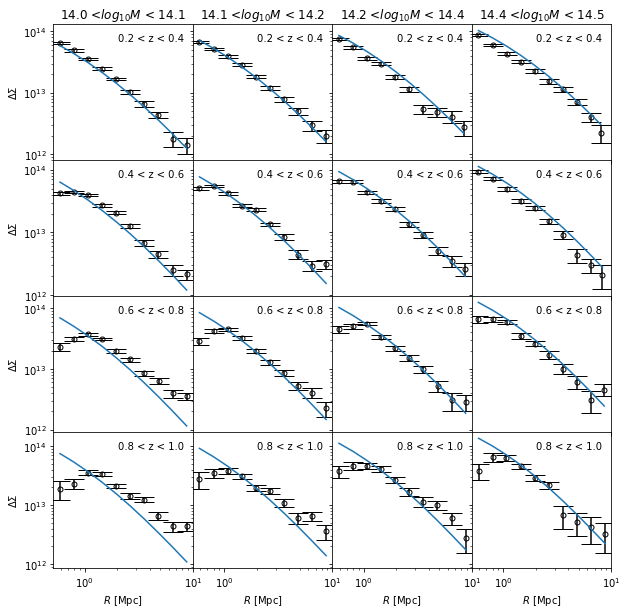

In [52]:
Nm=4
Nz=4
logm_edges = np.linspace(14, 14.5, Nm+1)
redshift_edges = np.linspace(0.2, 1, Nz+1)
fig, ax = plt.subplots(Nz,Nm, figsize=(10,10), sharex=True, sharey='row')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0)
moo = clmm.Modeling (massdef = 'critical', delta_mdef = 200, halo_profile_model = 'einasto')
moo.set_cosmo(cosmo)
moo.set_concentration (4)
for i in range(Nm):
    ax[0,i].set_title(f'{logm_edges[i]:.1f} <' + r'$log_{10}M$' +  f' < {logm_edges[i+1]:.1f}', fontsize=12)
    ax[Nz-1, i].set_xlabel(r'$R/$ [Mpc]')
    for j in range(Nz):
        ax[j, 0].set_ylabel(r'$\Delta\Sigma$')
        ax[j,i].plot([], [], 'w', label=f'{redshift_edges[j]:.1f} < z < {redshift_edges[j+1]:.1f}' )
        #try:
        ds_, ds_stack, radius_stack = ds(logm_edges[i], logm_edges[i+1], redshift_edges[j], redshift_edges[j+1])
        ax[j,i].errorbar(radius_stack, ds_stack, np.std(ds_, axis=0)/np.sqrt(len(ds_)-1),  fmt=' ', 
             capsize=10, marker='o', markerfacecolor='w', markersize=5, barsabove=True, color='k')
        ax[j,i].loglog()
        moo.set_mass (10**np.mean([logm_edges[i], logm_edges[i+1]]))
        ax[j,i].plot(radius_stack, moo.eval_excess_surface_density(radius_stack, np.mean([redshift_edges[j], redshift_edges[j+1]]))) 
        ax[j,i].legend(loc='upper right', frameon=False)
       # except: a=1
        #ax[j,i].set_xscale('log')